In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [4]:
# Read the city data file and store it in a pandas DataFrame
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [5]:
# Read the ride data file and store it in a pandas DataFrame
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [6]:
# Merging city and ride datasets
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [7]:
# Importing Numpy Dependency and the stats module fromSciPy
import numpy as np
import scipy.stats as sts

In [8]:
# Calculating Total Rides for each City
total_rides = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_rides.head()

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [9]:
# Calculating Total Fares for each City
total_fares = pyber_data_df.groupby(["type"]).sum()["fare"]
total_fares.head()

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [10]:
# Calculating Total Drivers for each City
total_drivers = city_data_df.groupby(["type"]).sum()["driver_count"]
total_drivers.head()

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [11]:
# Calculating Average Fare per Ride
average_fare_ride = pyber_data_df.groupby(["type"]).mean()["fare"]
average_fare_ride.head()

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [12]:
# Calculating Average Fare per Driver
average_fare_driver = total_fares / total_drivers
average_fare_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [13]:
# Creating Summary DataFrame
summary_df = pd.DataFrame({
             "Total Rides": total_rides,
             "Total Drivers": total_drivers,
             "Total Fares": total_fares,
             "Average Fare per Ride": average_fare_ride,
             "Average Fare per Driver": average_fare_driver})
summary_df.rename_axis(None, inplace=True)
summary_df.head()

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [14]:
# Foramtting Summary DataFrame
summary_df["Total Rides"] = summary_df["Total Rides"].map("{:,}".format)

summary_df["Total Drivers"] = summary_df["Total Drivers"].map("{:,}".format)

summary_df["Total Fares"] = summary_df["Total Fares"].map("${:,.2f}".format)

summary_df["Average Fare per Ride"] = summary_df["Average Fare per Ride"].map("${:,.2f}".format)

summary_df["Average Fare per Driver"] = summary_df["Average Fare per Driver"].map("${:,.2f}".format)

summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


In [15]:
# Multiple-Line Plot for the Sum of the Fares for Each City Type
pyber_data_df.rename(columns={"city": "City", "date": "Date", "fare": "Fare", 
                                   "ride_id": "Ride Id", "driver_count": "No. Drivers", "type":"City Type"}, inplace=True)
pyber_data_df = pyber_data_df.set_index(["Date"])
pyber_data_df

,City,Fare,Ride Id,No. Drivers,City Type
Date,,,,,
2019-01-14 10:14:22,Lake Jonathanshire,13.83,5739410935873,5,Urban
2019-03-04 18:24:09,South Michelleport,30.24,2343912425577,72,Urban
2019-02-24 04:29:00,Port Samanthamouth,33.44,2005065760003,57,Urban
2019-02-10 23:22:03,Rodneyfort,23.44,5149245426178,34,Urban
2019-03-06 04:28:35,South Jack,34.58,3908451377344,46,Urban
...,...,...,...,...,...
2019-04-29 17:04:39,Michaelberg,13.38,8550365057598,6,Rural
2019-01-30 00:05:47,Lake Latoyabury,20.76,9018727594352,2,Rural
2019-02-10 21:03:50,North Jaime,11.11,2781339863778,1,Rural


In [16]:
# Reordering the columns 
new_column_order = ["City Type", "Fare"]

# Assign district summary df the new column order
new_pyber_df = pyber_data_df[new_column_order]

new_pyber_df.head()

,City Type,Fare
Date,,
2019-01-14 10:14:22,Urban,13.83
2019-03-04 18:24:09,Urban,30.24
2019-02-24 04:29:00,Urban,33.44
2019-02-10 23:22:03,Urban,23.44
2019-03-06 04:28:35,Urban,34.58


In [17]:
# Setting index to datetime data type
new_pyber_df.index = pd.to_datetime(new_pyber_df.index)
new_pyber_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-14 10:14:22 to 2019-04-25 10:20:13
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   City Type  2375 non-null   object 
 1   Fare       2375 non-null   float64
dtypes: float64(1), object(1)
memory usage: 55.7+ KB


In [18]:
# Converting groupby series into a DataFrame
sum_of_fares_df = pd.DataFrame(new_pyber_df.groupby(["City Type" , "Date"]).sum()["Fare"])
sum_of_fares_df

Fare
City Type Date                      
Rural     2019-01-01 09:45:36  43.69
          2019-01-02 11:18:32  52.12
          2019-01-03 19:51:01  19.90
          2019-01-04 03:31:26  24.88
          2019-01-06 07:38:40  47.33
...                              ...
Urban     2019-05-08 04:20:00  21.99
          2019-05-08 04:39:49  18.45
          2019-05-08 07:29:01  18.55
          2019-05-08 11:38:35  19.77
          2019-05-08 13:10:18  18.04

[2375 rows x 1 columns]

In [19]:
# Resetting index and creating pivot table
# code taken from https://janakiev.com/blog/pandas-multiindex-pivot/

sf_pivot = sum_of_fares_df.reset_index()
sf_pivot = sf_pivot.pivot(index="Date", columns="City Type", values="Fare")
sf_pivot.head()

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [20]:
# Creating new DataFrame from pivot table for the given dates "2019-01-01":"2019-04-28"
new_sf_pivot_df=sf_pivot.loc['2019-01-01':'2019-04-28',]
new_sf_pivot_df

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [21]:
# Creating new DataFrame from sf_pivot with resample() mthod in weekly bins.
# For each weekly bin the sum() of the fares for each City Type will be calculated
plot_df=new_sf_pivot_df.resample("W").sum()
plot_df

City Type,Rural,Suburban,Urban
Date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


In [22]:
# Creating DataFrame for plotting
df=pd.DataFrame(plot_df)
df

City Type,Rural,Suburban,Urban
Date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


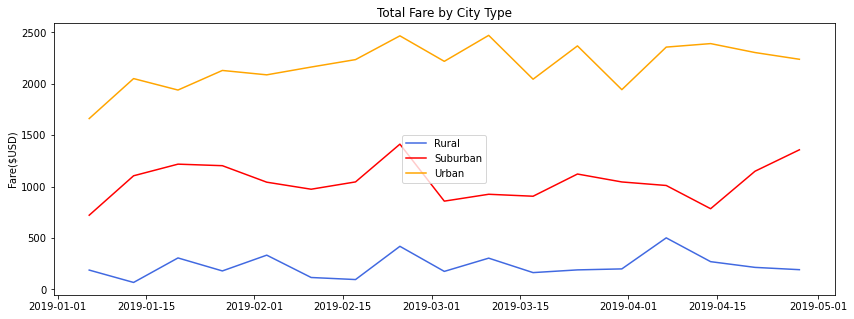

In [23]:
# Creating Line Chart
plt.figure(figsize=(14,5))
plt.plot(df.Rural, color="royalblue", label="Rural")
plt.plot(df.Suburban, color="red", label="Suburban")
plt.plot(df.Urban, color="orange", label="Urban")
plt.title("Total Fare by City Type")
plt.ylabel("Fare($USD)")
plt.legend(loc=10)
plt.style.use("fivethirtyeight")
plt.savefig("Images/Fig8.png");